In [1]:
import tensorflow as tf
print(tf.__version__)

C:\Users\ICT01_07\Anaconda\envs\tf_test\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ICT01_07\Anaconda\envs\tf_test\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ICT01_07\Anaconda\envs\tf_test\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ICT01_07\Anaconda\envs\tf_test\lib\site-packages\ten

1.14.0


C:\Users\ICT01_07\Anaconda\envs\tf_test\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ICT01_07\Anaconda\envs\tf_test\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ICT01_07\Anaconda\envs\tf_test\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ICT01_07\Anaconda\envs\tf_test\

In [3]:
#데이터타입
hello=tf.constant('Hello, TensorFlow!') 

#tensorflow :constant, vafiables, placeholder
sess=tf.Session() 
print(sess.run(hello))#tensorflow 의데이터는 직접 확인이 불가
print(hello) 

b'Hello, TensorFlow!'
Tensor("Const_1:0", shape=(), dtype=string)


In [4]:
#메모리 값만 저장되고 위치는 저장되지 않음

x=tf.constant(35,name="x") #변수가 있는데 이름을 주는 이유: 모델의 그래프 구조 확인, 모델을 그대로 저장(가중치저장)할때 메모리 위치를 확인하기 위해
y=tf.Variable(x+5,name='y') #변수가 있는 경우_반드시 초기화,이름이 바뀌어도 됌
print(y)

<tf.Variable 'y:0' shape=() dtype=int32_ref>


In [5]:
model=tf.global_variables_initializer() #변수초기화 시켜줘야 함

#######################################여기까지가 모델을 만드는 과정 이하는 학습과정
with tf.Session() as session:
    session.run(model)
    print (session.run(y))

40


In [7]:
#판다스에서 데이터 초기화(list, dict) #요소끼리 계산(행렬연산x 배열연산)
a=tf.constant([1,2,3],name='a') #GPU공간
b=tf.constant([1,2,3],name='b')
add_op=a+b

with tf.Session() as session:
    print(session.run(add_op))

[2 4 6]


In [9]:
#자료구조가 그래프로 형성 -골격(구조) 형성
a=tf.placeholder(tf.int16) #데이터없이 공간만확보
b=tf.placeholder(tf.int16)
add=tf.add(a,b)
mul=tf.multiply(a,b)
total=tf.multiply(add,mul)

In [11]:
#with 로 하면 좋은점: with 가 끝나면 자동으로 없어짐
with tf.Session() as sess: 
    print('feed 변수합: %i' % sess.run(add,feed_dict={a: 2,b:3}))
    print('feed 변수곱: %i' % sess.run(mul,feed_dict={a: 2,b:3}))
    print('feed 변수곱: %i' % sess.run(total,feed_dict={a: 2,b:3})) #위의 계산식이 없어도 나옴 

feed 변수곱: 30


In [16]:
matrix1=tf.constant([[3.,3.]]) #1x2
matrix2=tf.constant([[2.],[2.]]) #2x1=>1x1
product=tf.matmul(matrix1,matrix2) #matrix multiply

with tf.Session() as sess: #실행부
    result=sess.run(product)
    print(result)

[[12.]]


In [61]:
zeros=tf.zeros([2,2])#0
ones=tf.ones([6])#1

#균등분포
uniform=tf.random_uniform([3,3,3],minval=0.0,maxval=10)

#정규분포
normal=tf.random_normal([3,3,3],mean=0.0,stddev=2.0)

#표준편차 2배내의 것으로 초기화
trunc=tf.truncated_normal([2,2],mean=5.0,stddev=1.0)
random_var=tf.Variable(tf.truncated_normal([2,2]))

In [63]:
sess=tf.Session() #세션을 만들고
print(sess.run(trunc))   # trunc는 session 만 하면 됨


init=tf.global_variables_initializer() #초기화 아래 4줄이 세트 
with tf.Session() as session:          #vaiable은 with 과정을 해줘야 함 '변수가 있는 경우 반드시 초기화!!1'
    sess.run(init)
print('변수초기화',sess.run(random_var)) 

[[3.2127972 4.764406 ]
 [5.460865  4.732747 ]]
변수초기화 [[ 0.1492053   0.56155723]
 [-0.00883962  0.5727945 ]]


In [22]:
import tensorflow as tf
my_tensor=tf.constant(0,shape=[6,2]) #0으로 초기화하고 shape를 6x2 의행렬이 만들어지고=>상수화
my_static_shape=my_tensor.get_shape()
print(type(my_static_shape))
print(my_static_shape) #내용은 run으로 ,차수는 get_shape 함수로

my_tensor_transposed=tf.transpose(my_tensor) #전치
print(my_tensor_transposed.get_shape())

<class 'tensorflow.python.framework.tensor_shape.TensorShape'>
(6, 2)
(2, 6)


In [25]:
tf.InteractiveSession() #대화형 세션
tf.zeros(2)
a=tf.zeros(2)
print(a.eval()) #run 쓰지 않아도 됌

[0. 0.]


C:\Users\ICT01_07\Anaconda\envs\tf_test\lib\site-packages\tensorflow\python\client\session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [135]:
def showvalue(t):
    sess=tf.InteractiveSession()
    tf.global_variables_initializer().run()
    print(t.eval())
    sess.close()

In [136]:
c2,c3=tf.constant([1.2,5.6]),tf.constant([-4,-1,7])
v2,v3=tf.Variable([2.3,4.5]),tf.Variable([-2,3,5])
showvalue(tf.add_n([c2,v2]))
showvalue(tf.add_n([c3,v3,v3])) #여러개가 가능하도록

[ 3.5 10.1]
[-8  5 17]


C:\Users\ICT01_07\Anaconda\envs\tf_test\lib\site-packages\tensorflow\python\client\session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [137]:
#2x +y +z =1
#4x +3y +4z =2
#-4x +2y +2z =-6
#A dot x =[1, 2, -6] #행렬나누기 =>역행렬
#      y
#      z

#3x3 3x1=>3x1

sess=tf.Session()
x=tf.constant([2.0, 1.0, 1.0, 4, 3, 4, -4, 2, 2], shape=[3,3])
print(sess.run(x))
y=tf.constant([1.0, 2, -6], shape=[3,1])
print(sess.run(y))

[[ 2.  1.  1.]
 [ 4.  3.  4.]
 [-4.  2.  2.]]
[[ 1.]
 [ 2.]
 [-6.]]


In [138]:
z=tf.matrix_solve(x,y)
result=sess.run(z)
print('계수:',result)
print(sess.run(z))

#1, -2, 1

2*1 + (-2) +1

계수: [[ 1.0000001]
 [-2.0000002]
 [ 1.0000001]]
[[ 1.0000001]
 [-2.0000002]
 [ 1.0000001]]


1

In [139]:
print(2.0 *result[0] +1.0 *result[1] +1.0 *result[2])
print()
print(sess.run(tf.matmul(x,z)))

[1.0000001]

[[ 1.0000001]
 [ 2.       ]
 [-6.000001 ]]


In [140]:
x_1=tf.matrix_inverse(x)  #matrix_solve (역행렬)을 구하고 
z=tf.matmul(x_1,y)        #y 를 곱한것
print('해:',sess.run(z))

해: [[ 1.0000002]
 [-2.0000005]
 [ 1.0000002]]


In [141]:
#s, u, v 특이행렬 분해(singular value decomposition ) :앞뒤 차수, 즉 행렬이 다를때 
#PCA 할때 - 고유값 분해 (eigenvalue + eigenvector :정방행렬)
a=tf.constant([1,2,3,4,5,6],shape=[2,3]) #2x3 으로 행렬이 다를때 쓰는게 특이행렬 분해
a=tf.to_float(a)

#행과 열의 특징을 별도로 뽑음

#정방행렬:앞의 행렬과 맨 뒤의 행렬이 정방행렬로 나옴 
#truncate: s가 매개 역할 

s,u,v=tf.svd(a)  #3개로 나눠준다.(singular value) u(2x2), s(1x2), v(3x2) 
print(sess.run(s))
print(sess.run(u))
print(sess.run(v))

[9.508034   0.77286935]
[[-0.38631773 -0.92236584]
 [-0.92236584  0.38631773]]
[[-0.42866713  0.8059641 ]
 [-0.56630695  0.1123824 ]
 [-0.70394677 -0.58119917]]


In [142]:
diagonal=[1,2,3,4]
dia=tf.diag(diagonal) #대각행렬을 만들어줌 -one hot encoding 때 많이 씀 
print(sess.run(dia))

[[1 0 0 0]
 [0 2 0 0]
 [0 0 3 0]
 [0 0 0 4]]


In [143]:
print(sess.run(tf.diag_part(dia))) #요소만 뽑아줌
print(sess.run(tf.trace(dia))) ## 요소의 값을 더해줌


[1 2 3 4]
10


In [144]:
import numpy as np
a=tf.constant([1,2,3,4,5,6],shape=[2,3])
b=tf.constant([7,8,9,10,11,12],shape=[3,2])
c=tf.matmul(a,b)
sess.run(c) #2x2

array([[ 58,  64],
       [139, 154]])

In [145]:
#행렬: 맨 뒤에 차수의 행과열을 확인하고 앞의 것은 개수, 어떻게 층을 이루고 있는가
a=tf.constant(np.arange(1,13,dtype=np.int32),shape=[2,2,3]) #뒤에 2,3 , 행렬을 중심하고 데이터를 표현 ,2행 3열이 2개 
print(sess.run(a))
print()
b=tf.constant(np.arange(13,25,dtype=np.int32),shape=[2,3,2]) #뒤에 3,2 ,3행 2열이 2개 
print(sess.run(b))
c=tf.matmul(a,b)
sess.run(c)


[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]

[[[13 14]
  [15 16]
  [17 18]]

 [[19 20]
  [21 22]
  [23 24]]]


array([[[ 94, 100],
        [229, 244]],

       [[508, 532],
        [697, 730]]])

In [146]:
a=tf.constant(np.arange(1,25,dtype=np.int32),shape=[2,2,2,3]) #뒤에 2,3 , 행렬을 중심하고 데이터를 표현 ,2행 3열이 2x2개 
print(sess.run(a))
print()
b=tf.constant(np.arange(25,49,dtype=np.int32),shape=[2,2,3,2]) #뒤에 3,2 ,3행 2열이 2x2개 
print(sess.run(b))
c=tf.matmul(a,b)
sess.run(c)  #2행 2열 이 4개 


[[[[ 1  2  3]
   [ 4  5  6]]

  [[ 7  8  9]
   [10 11 12]]]


 [[[13 14 15]
   [16 17 18]]

  [[19 20 21]
   [22 23 24]]]]

[[[[25 26]
   [27 28]
   [29 30]]

  [[31 32]
   [33 34]
   [35 36]]]


 [[[37 38]
   [39 40]
   [41 42]]

  [[43 44]
   [45 46]
   [47 48]]]]


array([[[[ 166,  172],
         [ 409,  424]],

        [[ 796,  820],
         [1093, 1126]]],


       [[[1642, 1684],
         [1993, 2044]],

        [[2704, 2764],
         [3109, 3178]]]])

In [147]:
#a를 제곱한다면 :자기 자신을 제곱하려면 전치!!
d=tf.matmul(a,tf.transpose(a,perm=[0,1,3,2])) #뒤에 3,2를 바꿔주면됨
print(sess.run(d))


[[[[  14   32]
   [  32   77]]

  [[ 194  266]
   [ 266  365]]]


 [[[ 590  716]
   [ 716  869]]

  [[1202 1382]
   [1382 1589]]]]


In [148]:
#또는 
tf.matmul(a,a,transpose_b=True) #전치해서 자기 제곱

<tf.Tensor 'MatMul_6:0' shape=(2, 2, 2, 2) dtype=int32>

In [149]:
                          #0,1,2
x=tf.constant([[[1,2,3],  #2x2x3 =>제곱이 되려면 2x3x2 가 되면(인덱스 순서 0 2 1) 
              [4,5,6]],
              [[7,8,9],
              [10,11,12]]])
print(sess.run(tf.shape(x)))
sess.run(tf.transpose(x)) #3x2x2 :#디폴트 2 1 0

[2 2 3]


array([[[ 1,  7],
        [ 4, 10]],

       [[ 2,  8],
        [ 5, 11]],

       [[ 3,  9],
        [ 6, 12]]])

In [150]:
y=tf.transpose(x,perm=[0,2,1])
sess.run(tf.transpose(y))

array([[[ 1,  7],
        [ 2,  8],
        [ 3,  9]],

       [[ 4, 10],
        [ 5, 11],
        [ 6, 12]]])

In [151]:
sess.run(tf.matmul(x,tf.transpose(x,perm=[0,2,1])))

array([[[ 14,  32],
        [ 32,  77]],

       [[194, 266],
        [266, 365]]])

In [152]:
t=[1,2,3,4,5,6] #6차원으로 만들어야 할때
t=tf.reshape(t,[1,2,1,3,1,1]) #1은 데이터 개수에 무영향 1행 1열이 3개...
sess.run(t)

array([[[[[[1]],

          [[2]],

          [[3]]]],



        [[[[4]],

          [[5]],

          [[6]]]]]])

In [153]:
print('t의 차원은',sess.run(tf.shape(t)))

t의 차원은 [1 2 1 3 1 1]


In [154]:
print('차원의 수를 축소할때',sess.run(tf.shape(tf.squeeze(t)))) #1이 모두 없어짐 2x3으로 축소됨

차원의 수를 축소할때 [2 3]


In [155]:
tensor=[1,2,3,4,5,6,7,8,9,10,11,12]
print(sess.run(tf.reshape(tensor,[2,-1])))  #계산으로 채워라 6개가 들어옴
print()
tf.reshape(tensor,[-1,6])  #2개가 들어옴
print(sess.run(tf.reshape(tensor,[2,-1,3]))) #2개가 들어옴 

[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]]

[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]


In [156]:
#t: 원래차원 1,2,1,3  =>1,1,2,1,3,1,1
print(tf.expand_dims(t,0)) #차원확대

Tensor("ExpandDims:0", shape=(1, 1, 2, 1, 3, 1, 1), dtype=int32)


In [157]:
#padding 충전재
t=[[1,2,3],[4,5,6]] #2x3=>4x7로 만들어라
paddings=[[1,1,],[2,2]] #위아래 왼쪽 오른쪽
print(sess.run(tf.pad(t,paddings,"CONSTANT")))

[[0 0 0 0 0 0 0]
 [0 0 1 2 3 0 0]
 [0 0 4 5 6 0 0]
 [0 0 0 0 0 0 0]]


In [158]:
paddings=[[1,1,],[1,1]] #
print(sess.run(tf.pad(t,paddings,"REFLECT")))

[[5 4 5 6 5]
 [2 1 2 3 2]
 [5 4 5 6 5]
 [2 1 2 3 2]]


In [159]:
print(sess.run(tf.pad(t,paddings,"SYMMETRIC"))) #??

[[1 1 2 3 3]
 [1 1 2 3 3]
 [4 4 5 6 6]
 [4 4 5 6 6]]


# 다차 방정식의 해
무작위 대입법
역행렬의 구함 (x,y값이 다 결정되어있을때)
입출력 데이터만 있을 때: 계수 결정(가중치 학습을 통해서 학습)

데이터(minibatch 후에=>feeding 해준다)->행렬곱 또는 수식 ->loss func ->optimizer ->minimize ->for 반복문 

In [89]:
#데이터로 부터 규칙을 발견->분류와 예측을 하기 위해

#랜덤으로 데이터를 생성=>minibatch 후에=>feeding 해준다.!!
x_data=np.random.rand(100).astype(np.float32)  
y_data=x_data*0.1+0.3  #선형방정식으로 만듦, 어떻게 0.1 ,0.3을 알아내느냐 !!!
len(y_data)


100

In [96]:
#가중치와 bias
#설명력
#bias 는 activation 활성화 
#모든 가중치에는 꼭 바이어스가 한개씩 결합
W=tf.Variable(tf.random_uniform([1],-0.1,1.0)) #균등분포
b=tf.Variable(tf.zeros([1])) #bias 
sess=tf.Session() 
y=W*x_data+b  #예측

In [97]:
#loss function -mean square error :mse :2차원인 경우 포물선을 이루고 최적점은 한 개 
loss=tf.reduce_mean(tf.square(y-y_data))  #y가 예측값, y_data 가 실제값 reduce 합

#GradientDescentOptimizer 경사하강법 
#기울기: 미분을 이용해서 기울기가 -면 가중치에 차를 더해주고, 기울기가 +면 가중치에 감하는 연산
optimizer=tf.train.GradientDescentOptimizer(0.5) #0.5는 learning rate학습율
train=optimizer.minimize(loss)  #loss 를 가장 적게 하는 값을 찾아라

In [98]:
init=tf.global_variables_initializer() #session run 하기 전에만 호출해주면됨!! 왜 ? Variable 에 가중치가 들어가기 때문에 
sess.run(init)

In [102]:
for step in range(201): #200번회전
    sess.run(train)
    if step % 20==0:       #20번마다 
       print(step,sess.run(W),sess.run(b))  #0.1 + 0.3 으로 수렴해

0 [0.73156786] [-0.05455677]
20 [0.24329709] [0.22436982]
40 [0.13206798] [0.28307498]
60 [0.10717639] [0.2962124]
80 [0.10160598] [0.2991524]
100 [0.10035941] [0.29981032]
120 [0.10008043] [0.29995757]
140 [0.100018] [0.2999905]
160 [0.10000403] [0.2999979]
180 [0.10000091] [0.29999954]
200 [0.1000002] [0.2999999]


# 주입변수로 주입

In [111]:

x=tf.placeholder(tf.float32,name='x')
y=tf.placeholder(tf.float32)

W=tf.Variable(tf.random_uniform([1],-0.1,1.0)) #균등분포
b=tf.Variable(tf.zeros([1])) #bias 
sess=tf.Session() 

y_model=W*x+b #예측

loss=tf.reduce_mean(tf.square(y_model-y)) #y_model 이 예측값
optimizer=tf.train.GradientDescentOptimizer(0.5) #0.5는 learning rate학습율
train=optimizer.minimize(loss) 
init=tf.global_variables_initializer() #session run 하기 전에만 호출해주면됨!! 왜 ? Variable 에 가중치가 들어가기 때문에 
sess.run(init)

for step in range(201): #200번회전
    sess.run(train,{x:x_data,y:y_data})
    if step % 20==0:       #20번마다 
       print(step,sess.run(W),sess.run(b))

0 [0.27973354] [0.27599207]
20 [0.13367666] [0.28222594]
40 [0.10753639] [0.29602242]
60 [0.10168656] [0.29910988]
80 [0.10037743] [0.2998008]
100 [0.10008448] [0.29995543]
120 [0.10001892] [0.29999003]
140 [0.10000424] [0.29999778]
160 [0.10000096] [0.2999995]
180 [0.10000022] [0.2999999]
200 [0.1000001] [0.29999995]


In [112]:
predicted=sess.run(y_model,{x:[i for i in range(100)]})

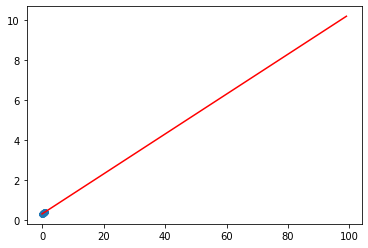

In [113]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x_data,y_data,'o',markersize=5)
plt.plot(predicted,'r')
plt.show()

In [115]:
from tensorflow.python.framework import ops
import os
ops.reset_default_graph()

In [118]:
sess=tf.Session()
x_vals=np.array([1.,3.,5.,7.,9.])
y_vals=np.array([1.,3.,5.,7.,9.])
x_data=tf.placeholder(tf.float32)
y_data=tf.placeholder(tf.float32)
m=tf.constant(3.)
prod=tf.multiply(x_data,y_data)
for x_val in x_vals:
    print(sess.run(prod, feed_dict={x_data:x_val,
                                   y_data:y_vals}))


[1. 3. 5. 7. 9.]
[ 3.  9. 15. 21. 27.]
[ 5. 15. 25. 35. 45.]
[ 7. 21. 35. 49. 63.]
[ 9. 27. 45. 63. 81.]


In [119]:
merged=tf.summary.merge_all()
if not os.path.exists('c://tmp/tensorboard_logs/'):
    os.makedirs('c://tmp/tensorboard_logs/')
    
my_writer=tf.summary.FileWriter('c://tmp/tensorboard_logs/',sess.graph)

In [129]:
import numpy
rng=numpy.random

#변수를 따로 두고 상수화할때 좋은점: 수정할때 좋음
learning_rate=0.01
training_epochs=4000
display_step=50
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,3.465,1.65,2.904,2.42,2.94,1.3]) 
#행 또는 열밖에 없는 데이터

In [130]:

n_samples=train_X.shape[0] #[0]:행의 수=>행의 수는 data point =관측치 , 0인데스 다음은 [1], [1]은 열의 수
                              #차수 :행 (3,4) :인덱스 접근
X=tf.placeholder('float')
Y=tf.placeholder('float')
W=tf.Variable(rng.randn(),name='weight') #설명
b=tf.Variable(rng.randn(),name='bias') #activation 활성화

activation=tf.add(tf.multiply(X,W),b) #수식!! y=ax + b  #노드, 그래서  실행안됨
cost=tf.reduce_sum(tf.pow(activation-Y,2)/(2*n_samples))  #엣지 2를 곱한이유: 행 또는 열 밖에 없는 데이터 이기 때문에 !!
#                     제곱 (예측치- 실제값)
#역전파:optimizer도 hyper parameter
optimizer=tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)  #GradientDescentOptimizer 는 기울기, 최소화를 넣어야 함#momentum:고려
init=tf.initialize_all_variables()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Epoch: 0001 cost= 11.637424469 W= -0.35520968 b= -0.014885382
Epoch: 0051 cost= 0.104945138 W= 0.34319824 b= 0.1280817
Epoch: 0101 cost= 0.101711035 W= 0.3376311 b= 0.16813107
Epoch: 0151 cost= 0.098850653 W= 0.33239505 b= 0.20579877
Epoch: 0201 cost= 0.096320853 W= 0.32747042 b= 0.24122597
Epoch: 0251 cost= 0.094083399 W= 0.32283872 b= 0.2745462
Epoch: 0301 cost= 0.092104584 W= 0.31848243 b= 0.30588502
Epoch: 0351 cost= 0.090354525 W= 0.31438527 b= 0.33535928
Epoch: 0401 cost= 0.088806771 W= 0.3105319 b= 0.3630809
Epoch: 0451 cost= 0.087437972 W= 0.30690753 b= 0.38915408
Epoch: 0501 cost= 0.086227439 W= 0.3034988 b= 0.4136761
Epoch: 0551 cost= 0.085156940 W= 0.30029288 b= 0.43673965
Epoch: 0601 cost= 0.084210217 W= 0.29727754 b= 0.45843178
Epoch: 0651 cost= 0.083373010 W= 0.29444143 b= 0.47883418
Epoch: 0701 cost= 0.082632668 W= 0.29177418 b= 0.49802262
Epoch: 0751 cost= 0.081978016 W= 0.28926542 b= 0.5160697
Epoch: 0801 cost= 0.081399113 W= 0.28690597 b= 0.5330438
Epoch: 0851 cost= 0

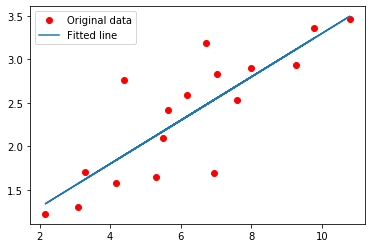

In [132]:
#그래프 정의 :node (연산)+ edge(데이터전달:tensor(배열+행렬))
#전제조건:GPU 가 존재한다는 가정에서=>네트워크로 연결한다. (sessiond으로)
with tf.Session() as sess: #실행부
    sess.run(init)
    for epoch in range(training_epochs): #epoch : 반복해서 돌아간다.=> 4000번씩 
        for (x,y) in zip(train_X, train_Y): #데이터가 한개씩 feeding 
            sess.run(optimizer,feed_dict={X:x, Y:y})
        if epoch % display_step==0:   #비용함수: 감소해야 : 우하향 #accuracy(정확도) :점점 증가해야
            print('Epoch:', '%04d' % (epoch+1),'cost=','{:.9f}'.format(sess.run(cost,feed_dict={X:train_X, Y:train_Y})),
                 "W=",sess.run(W),'b=',sess.run(b))  #수렴값확인
    print('최적화종료')
    print('cost=',sess.run(cost,feed_dict={X:train_X, Y:train_Y}),
         'W=',sess.run(W),'b=',sess.run(b))
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    #predict 한 결과값 출력
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b),
             label="Fitted line")
    plt.legend()
    plt.show()

In [166]:
#tensor->직접 시각화하는 것이 불가능=>numpy 포멧으로 변경
def run_variable(variable):
    tf.global_variables_initializer()
    with tf.Session() as sess:
        return sess.run(variable)

In [167]:
my_distribution=tf.random_uniform((600,4),seed=42) #24
uniform=run_variable(my_distribution)

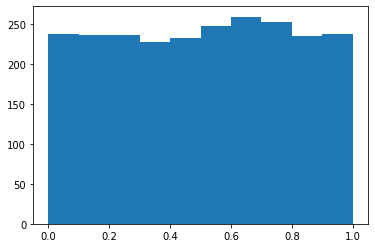

In [168]:
from matplotlib import pyplot as plt
plt.hist(uniform.flatten()) #데이터 메모리 저장: "1차원"으로 저장되는 포멧으로 바꿔라
plt.show()

# activation 함수: 
활성화 함수 :역할-회귀냐 분류인가를 결정

-비선형 매핑(선형대수->비선형 문제로 변경)
-가중치를 깊게 하고 활성화 함수 매핑으로 XOR 문제를 해결
-한번 정의된 그래프를 리셋해줘햐 한다.

In [193]:
ops.reset_default_graph() #그래프 초기화
sess=tf.Session()

x_vals=np.linspace(start=-10., stop=10., num=100)
print(x_vals)

[-10.          -9.7979798   -9.5959596   -9.39393939  -9.19191919
  -8.98989899  -8.78787879  -8.58585859  -8.38383838  -8.18181818
  -7.97979798  -7.77777778  -7.57575758  -7.37373737  -7.17171717
  -6.96969697  -6.76767677  -6.56565657  -6.36363636  -6.16161616
  -5.95959596  -5.75757576  -5.55555556  -5.35353535  -5.15151515
  -4.94949495  -4.74747475  -4.54545455  -4.34343434  -4.14141414
  -3.93939394  -3.73737374  -3.53535354  -3.33333333  -3.13131313
  -2.92929293  -2.72727273  -2.52525253  -2.32323232  -2.12121212
  -1.91919192  -1.71717172  -1.51515152  -1.31313131  -1.11111111
  -0.90909091  -0.70707071  -0.50505051  -0.3030303   -0.1010101
   0.1010101    0.3030303    0.50505051   0.70707071   0.90909091
   1.11111111   1.31313131   1.51515152   1.71717172   1.91919192
   2.12121212   2.32323232   2.52525253   2.72727273   2.92929293
   3.13131313   3.33333333   3.53535354   3.73737374   3.93939394
   4.14141414   4.34343434   4.54545455   4.74747475   4.94949495
   5.151515

[-0.  3. 10.]
[0.26894143 0.5        0.7310586 ]
[-0.7615942  0.         0.7615942]
[0.31326166 0.6931472  1.3132616 ]
[4.53988992e-05 5.55621925e-05 6.80006294e-05 8.32234827e-05
 1.01854002e-04 1.24654915e-04 1.52559623e-04 1.86710374e-04
 2.28504961e-04 2.79653838e-04 3.42249995e-04 4.18854392e-04
 5.12600439e-04 6.27321712e-04 7.67708042e-04 9.39496227e-04
 1.14970295e-03 1.40690911e-03 1.72160671e-03 2.10662180e-03
 2.57762963e-03 3.15378152e-03 3.85846667e-03 4.72023638e-03
 5.77392318e-03 7.06199264e-03 8.63617122e-03 1.05593993e-02
 1.29081631e-02 1.57752639e-02 1.92730804e-02 2.35373794e-02
 2.87317129e-02 3.50524161e-02 4.27341757e-02 5.20560700e-02
 6.33478781e-02 7.69963170e-02 9.34506760e-02 1.13227094e-01
 1.36910472e-01 1.65152775e-01 1.98666320e-01 2.38210660e-01
 2.84571982e-01 3.38534624e-01 4.00845440e-01 4.72173209e-01
 5.53066799e-01 6.43916968e-01 7.44927069e-01 8.56097102e-01
 9.77223714e-01 1.10791615e+00 1.24762553e+00 1.39568309e+00
 1.55134197e+00 1.71381783e

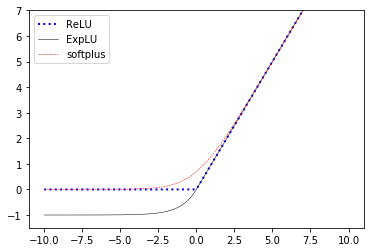

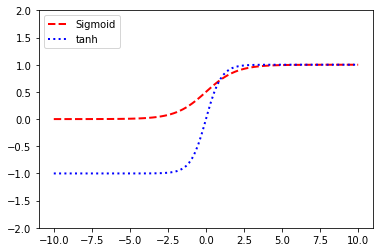

In [194]:
#relu
print(sess.run(tf.nn.relu([-3., 3., 10]))) #0~ inf
y_relu=sess.run(tf.nn.relu(x_vals))

#sigmoid
print(sess.run(tf.nn.sigmoid([-1., 0., 1]))) #0~1
y_sigmoid=sess.run(tf.nn.sigmoid(x_vals))

#tanh
print(sess.run(tf.nn.tanh([-1., 0., 1]))) #-1~1
y_tanh=sess.run(tf.nn.tanh(x_vals))

#softplus
print(sess.run(tf.nn.softplus([-1., 0., 1]))) #각진단점보완....
y_softplus=sess.run(tf.nn.softplus(x_vals))
print(y_softplus) 

#elu
print(sess.run(tf.nn.elu([-1., 0., 1]))) #-1 ~inf(무한대)
y_elu=sess.run(tf.nn.elu(x_vals))
print(y_elu)

plt.plot(x_vals,y_relu,'b:',label="ReLU",linewidth=2)
plt.plot(x_vals,y_elu,'k-',label="ExpLU",linewidth=0.5)
plt.plot(x_vals,y_softplus,'r--',label="softplus",linewidth=0.5)
plt.ylim([-1.5,7])
plt.legend(loc='upper left')
plt.show()
plt.plot(x_vals, y_sigmoid,'r--',label='Sigmoid',linewidth=2)
plt.plot(x_vals, y_tanh,'b:',label='tanh',linewidth=2)
plt.ylim([-2,2])
plt.legend(loc='upper left')
plt.show()


In [199]:
ops.reset_default_graph() #그래프 초기화
sess=tf.Session()
tf.set_random_seed(5) #텐서플로 시드의 초기값
np.random.seed(42) #넘파이 시드의 초기값
batch_size=50
a1=tf.Variable(tf.random_normal(shape=[1,1])) #a1 a2 는 가중치
b1=tf.Variable(tf.random_uniform(shape=[1,1])) #bias
a2=tf.Variable(tf.random_normal(shape=[1,1]))
b2=tf.Variable(tf.random_uniform(shape=[1,1]))
x=np.random.normal(2,0.1,500)

#사이즈를 fix 하지 않고 입력 데이터로 부터 계산
x_data=tf.placeholder(shape=[None, 1],dtype=tf.float32)
                     #shape=[None, 1] : 행데이터로 생성하라

In [200]:
#y=ax + b 는 같은데 0~1 사이값으로 
sigmoid_activation=tf.sigmoid(tf.add(tf.matmul(x_data,a1),b1))

#0~ oo (무한대)
relu_activation=tf.nn.relu(tf.add(tf.matmul(x_data,a2),b2))

#0.75 로 수렴하는 과정
#MSE 
loss1=tf.reduce_mean(tf.square(tf.subtract(sigmoid_activation,0.75)))
loss2=tf.reduce_mean(tf.square(tf.subtract(relu_activation,0.75)))

init=tf.global_variables_initializer()
sess.run(init)
my_opt=tf.train.GradientDescentOptimizer(0.01)
train_step_sigmoid=my_opt.minimize(loss1)
train_step_relu=my_opt.minimize(loss2)
print('\n Sigmoid And Relu 함수의 최적화 0.75')


 Sigmoid And Relu 함수의 최적화 0.75


In [201]:
loss_vec_sigmoid=[]  #loss 값을 저장하기 위해 만들어 놓음
loss_vec_relu=[]

In [202]:
for i in range(500): 
    rand_indices=np.random.choice(len(x),size=batch_size)  #len(x) 500->50개를 선택
    x_vals=np.transpose([x[rand_indices]]) #모양을 맞추기위해
    sess.run(train_step_sigmoid, feed_dict={x_data:x_vals})
    sess.run(train_step_relu, feed_dict={x_data:x_vals})
    loss_vec_sigmoid.append(sess.run(loss1, feed_dict={x_data:x_vals}))
    loss_vec_relu.append(sess.run(loss2, feed_dict={x_data:x_vals}))
    
    sigmoid_output=np.mean(sess.run(sigmoid_activation, feed_dict={x_data:x_vals}))
    relu_output=np.mean(sess.run(relu_activation, feed_dict={x_data:x_vals}))
    if i % 50==0:
        print('sigmoid=' +str(np.mean(sigmoid_output))+'relu='+str(np.mean(relu_output)))
#0.75로 수렴하는 과정    

sigmoid=0.12655206relu=2.0227606
sigmoid=0.17863758relu=0.7530296
sigmoid=0.24769813relu=0.7492897
sigmoid=0.3446748relu=0.7499546
sigmoid=0.4400661relu=0.7539999
sigmoid=0.5236898relu=0.754772
sigmoid=0.58373857relu=0.7508698
sigmoid=0.62733483relu=0.7470234
sigmoid=0.6549499relu=0.75180537
sigmoid=0.67452586relu=0.75470716


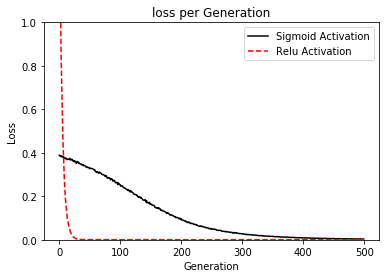

In [203]:
plt.plot(loss_vec_sigmoid, 'k-', label='Sigmoid Activation')
plt.plot(loss_vec_relu, 'r--', label='Relu Activation')
plt.ylim([0, 1.0])
plt.title('loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show() 

In [ ]:
#relu 가 개발되기 전까지는 sigmoid 함수를 썼음

In [ ]:
딥하게 하면 특징소실이 줄어듦
활성함수를 쓰면 선형 -> 비선형에 
cost fuc 을 하는 이유:accuracy 가 0으로 가지 않게 하려고
경사하강법:학습율과 기울기 문제를 컨트롤함....
